# Amazon Customers Data Analysis
Weekly challenge: week 5  
Date: 8/22/2022

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from tqdm.notebook import tqdm_notebook # progress bar library
# Moving Blue Bar: process undergoing
# Stable Green Bar: process is completed
# Red Bar: process is being stopped

import warnings
warnings.filterwarnings('ignore')

Online sqlite compiler to open the project database file "database.sqlite"  
https://sqliteonline.com/

## Read the data file

In [2]:
connection = sqlite3.connect(r'C:\Users\unpat\_Projects\Challenge_AprojectAweek_data_files\Week_05\database.sqlite')

In [3]:
type(connection)

sqlite3.Connection

In [4]:
df = pd.read_sql_query('SELECT * FROM Reviews', connection)

## Previewing the data

In [5]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [6]:
# If only top 3 rows from the database are needed
pd.read_sql_query('SELECT * FROM Reviews LIMIT 3', connection)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [7]:
df.shape

(568454, 10)

In [8]:
# Checking the data types
# df.info() -- summary of the dataframe; when many columns, Pandas won't display the summary
# df.info(verbose = True) -- this will show summary with all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


**Checking for special character nulls**

Checking possible null values - [?.,:*] only on text columns  
for col in df2.select_dtypes(exclude='number').columns:  
  print(f"{col}: {df2[col].str.contains('[?.,:*]').sum()} possible null(?.,:*) values")  
  
If you want to replace the '?' values  
df2.replace({'?':np.nan})

In [9]:
# Checking possible null values - [?.,:] only on text columns
for col in df.select_dtypes(exclude='number').columns:
    print(f"{col}: {df[col].str.contains('[?.,:*]').sum()} possible null(?.,:*) values")

ProductId: 0 possible null(?.,:*) values
UserId: 0 possible null(?.,:*) values
ProfileName: 175544 possible null(?.,:*) values
Summary: 112728 possible null(?.,:*) values
Text: 561850 possible null(?.,:*) values


The last 3 columns are purely text columns and so I am not concerned with the special character nulls.  
The first 2 columns do not have any possible null from "?.,:*".

## Descriptive Statistics Profiling

In [10]:
df.describe(include='all')

Id   ProductId          UserId       ProfileName  \
count   568454.000000      568454          568454            568454   
unique            NaN       74258          256059            218418   
top               NaN  B007JFMH8M  A3OXHLG6DIBRW8  C. F. Hill "CFH"   
freq              NaN         913             448               451   
mean    284227.500000         NaN             NaN               NaN   
std     164098.679298         NaN             NaN               NaN   
min          1.000000         NaN             NaN               NaN   
25%     142114.250000         NaN             NaN               NaN   
50%     284227.500000         NaN             NaN               NaN   
75%     426340.750000         NaN             NaN               NaN   
max     568454.000000         NaN             NaN               NaN   

        HelpfulnessNumerator  HelpfulnessDenominator          Score  \
count          568454.000000            568454.00000  568454.000000   
unique                   NaN                     NaN            NaN   
top                      NaN                     NaN            NaN   
freq                     NaN                     NaN            NaN   
mean                1.743817                 2.22881       4.183199   
std                 7.636513                 8.28974       1.310436   
min                 0.000000                 0.00000       1.000000   
25%                 0.000000                 0.00000       4.000000   
50%                 0.000000                 1.00000       5.000000   
75%                 2.000000                 2.00000       5.000000   
max               866.000000               923.00000       5.000000   

                Time     Summary  \
count   5.684540e+05      568454   
unique           NaN      295744   
top              NaN  Delicious!   
freq             NaN        2462   
mean    1.296257e+09         NaN   
std     4.804331e+07         NaN   
min     9.393408e+08         NaN   
25%     1.271290e+09         NaN   
50%     1.311120e+09         NaN   
75%     1.332720e+09         NaN   
max     1.351210e+09         NaN   

                                                     Text  
count                                              568454  
unique                                             393579  
top     This review will make me sound really stupid, ...  
freq                                                  199  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

Comments:  

Numerical columns "HelpfulnessNumerator" & "HelpfulnessDenominator" are right skewed.  
Numerical column "Score" is a bit left skewed.

## Perform sentiment analysis on the data

In [11]:
# Install a library for sentiment analysis
#!pip install TextBlob

In [12]:
from textblob import TextBlob

In [13]:
# Example of how to use textblob library
text = df['Summary'][0]
print("Text: ", text)
print("Sentiment of the Text: ", TextBlob(text).sentiment.polarity)

Text:  Good Quality Dog Food
Sentiment of the Text:  0.7


In [14]:
# List to store polarity of each 'Summary'
polarity_ = []

for i in tqdm_notebook(df['Summary']): # adding progress bar to the for loop
    try:
        polarity_.append(TextBlob(i).sentiment.polarity)
    except:
        polarity_.append(0) # 0 for if there is any empty cell

  0%|          | 0/568454 [00:00<?, ?it/s]

In [15]:
len(polarity_)

568454

In [16]:
# Creating a copy of the data
data = df.copy()

In [17]:
# Adding polarity values in a new 'PolarityOfSummary' column
data['PolarityOfSummary'] = polarity_

In [18]:
data.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   PolarityOfSummary  
0                0.7  
1                0.0  
2                0.0

In [19]:
# Finding the positive summary (polarity > 0)
data_positive = data[data['PolarityOfSummary'] > 0]

In [20]:
data_positive.shape

(331665, 11)

### Perform EDA for the positive sentences

In [21]:
# Installing wordcloud to find the key words
# !pip install wordcloud

In [22]:
from wordcloud import WordCloud, STOPWORDS
# STOPWORDS: he, she, it, they, them, his, him, her, ...

In [23]:
# finding unique stop words
unique_stopwords = set(STOPWORDS)

In [24]:
len(unique_stopwords)

192

In [25]:
data_positive.head(3)

Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
4            Great taffy  Great taffy at a great price.  There was a wid...   
5             Nice Taffy  I got a wild hair for taffy and ordered this f...   

   PolarityOfSummary  
0                0.7  
4                0.8  
5                0.6

In [26]:
# Joining all the positive polarity (> 0 polarity) words in a string to use in the wordcloud
total_text_positive = (' '.join(data_positive['Summary']))
len(total_text_positive)

8465012

In [27]:
total_text_positive[0:7]

'Good Qu'

In [28]:
total_text_positive[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [29]:
# Replacing unwanted special characters (.!\% etc...) with spaces
# Importing regular expression module
import re
total_text_positive = re.sub('[^a-zA-Z]', ' ', total_text_positive)

In [30]:
total_text_positive[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [31]:
# Removing the extra spaces
total_text_positive = re.sub(' +', ' ', total_text_positive)

**Generating the word cloud for positive polarity**

(-0.5, 999.5, 499.5, -0.5)

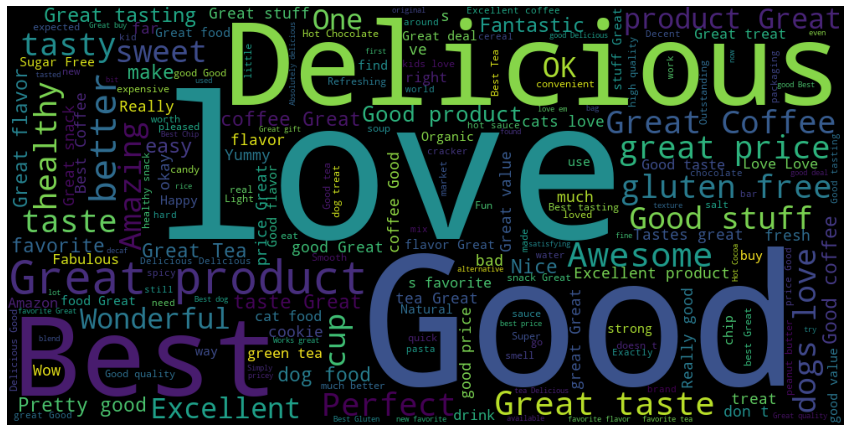

In [32]:
wordcloud_positive = WordCloud(width = 1000, height = 500, stopwords = unique_stopwords).generate(total_text_positive)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud_positive)
plt.axis('off')

### Perform EDA for the negative sentences

In [33]:
# Finding the positive summary (polarity > 0)
data_negative = data[data['PolarityOfSummary'] < 0]

In [34]:
data_negative.shape

(52516, 11)

In [35]:
# Joining all the negative polarity (< 0 polarity) words in a string to use in the wordcloud
total_text_negative = (' '.join(data_negative['Summary']))
len(total_text_negative)

1438541

In [36]:
# Replacing unwanted special characters (.!\% etc...) with spaces
total_text_negative = re.sub('[^a-zA-Z]', ' ', total_text_negative)

In [37]:
total_text_negative[0:1000]

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [38]:
# Removing the extra spaces
total_text_negative = re.sub(' +', ' ', total_text_negative)

In [39]:
total_text_negative[0:1000]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

**Generating the word cloud for negative polarity**

(-0.5, 999.5, 499.5, -0.5)

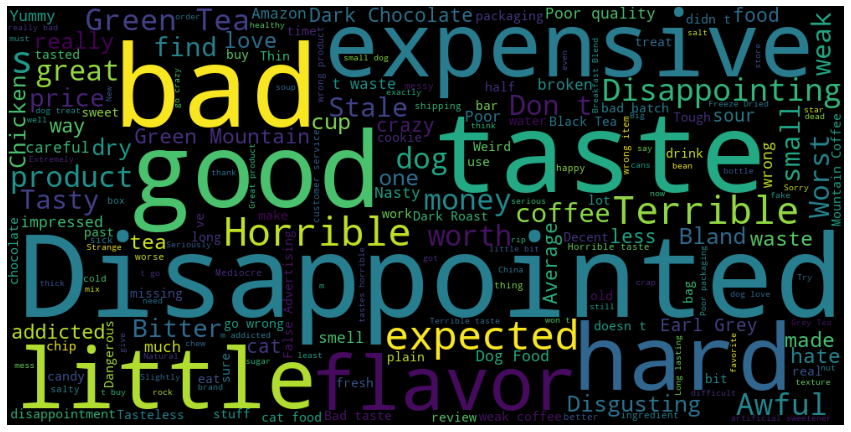

In [40]:
wordcloud_negative = WordCloud(width = 1000, height = 500, stopwords = unique_stopwords).generate(total_text_negative)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud_negative)
plt.axis('off')

### Which users Amazon can recommend more products?  
Amaozn would recommend more products to those users who are going to buy more

In [41]:
df.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [42]:
df['UserId'].nunique()

256059

In [43]:
raw = df.groupby('UserId').agg({'Summary':'count', 'Text':'count', 'Score':'mean', 'ProductId':'count'}).sort_values(
    by='Text', ascending=False)

In [44]:
raw

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256
...                 ...   ...       ...        ...
A2HROKQO0GA5AF        1     1  3.000000          1
A2HROR28DMJV2W        1     1  5.000000          1
A2HRR8CO2Y20G8        1     1  5.000000          1
A2HRSML93IK9TR        1     1  5.000000          1
AZZZOVIBXHGDR         1     1  2.000000          1

[256059 rows x 4 columns]

In [45]:
raw.columns = ['no_of_summaries', 'no_of_text', 'avg_score', 'no_of_prod_purchased']

In [46]:
raw

no_of_summaries  no_of_text  avg_score  no_of_prod_purchased
UserId                                                                      
A3OXHLG6DIBRW8              448         448   4.535714                   448
A1YUL9PCJR3JTY              421         421   4.494062                   421
AY12DBB0U420B               389         389   4.647815                   389
A281NPSIMI1C2R              365         365   4.841096                   365
A1Z54EM24Y40LL              256         256   4.453125                   256
...                         ...         ...        ...                   ...
A2HROKQO0GA5AF                1           1   3.000000                     1
A2HROR28DMJV2W                1           1   5.000000                     1
A2HRR8CO2Y20G8                1           1   5.000000                     1
A2HRSML93IK9TR                1           1   5.000000                     1
AZZZOVIBXHGDR                 1           1   2.000000                     1

[256059 rows x 4 columns]

In [47]:
# Finding top 20 users
top_20_users = raw.index[0:20]

In [48]:
top_20_user_prod_purchase = raw['no_of_prod_purchased'][0:20]

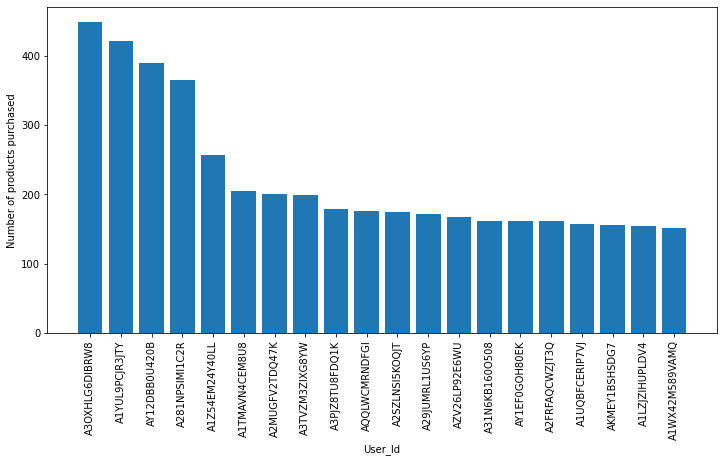

In [49]:
plt.figure(figsize = (12, 6))
plt.bar(top_20_users, top_20_user_prod_purchase, label = 'most recommended users')
plt.xlabel('User_Id')
plt.ylabel('Number of products purchased')
plt.xticks(rotation = 'vertical')
plt.show()

Comments:
    
Amazon would recommend more products to these top 20 users.

### Analyze length of the comments to see if users are giving long comments or short comments

In [50]:
# Using only a sample of data (this is optional and one can use all available data)
# df.sample(n = 2000)
final = df[0:2000]

In [51]:
final.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [52]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [53]:
final.duplicated().sum()

0

In [54]:
final['Text']

0       I have bought several of the Vitality canned d...
1       Product arrived labeled as Jumbo Salted Peanut...
2       This is a confection that has been around a fe...
3       If you are looking for the secret ingredient i...
4       Great taffy at a great price.  There was a wid...
                              ...                        
1995    I have to laugh at the reviews that said it wa...
1996    I had read some favorable reviews of this panc...
1997    I was expecting great things based on the revi...
1998    I love this pancake mix.  I bought my first ca...
1999    What can i say??  They are wonderful, and the ...
Name: Text, Length: 2000, dtype: object

In [55]:
final['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [56]:
final['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [57]:
len(final['Text'][0].split(' '))

49

In [58]:
# function to calculate length of each comment
def calc_len(text):
    return len(text.split(' '))

In [59]:
# applying the function to the text column
final['Text_length'] = final['Text'].apply(calc_len)

Destribution of the text length

In [60]:
import plotly.express as px

In [61]:
px.box(final, y = 'Text_length')

Comments:

-- About 50% of usera wrote comments of upto about 50 words.  
-- A few users wrote lengthy comments.

### Analyzing score

<AxesSubplot:xlabel='Score', ylabel='count'>

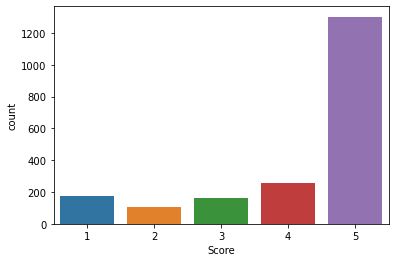

In [62]:
sns.countplot(final['Score'])

Comments:

Most of the customers gave 5 score on the products.

### Analyzing behaviour of customers

In [63]:
final.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

   Text_length  
0           49  
1           31  
2           99

In [64]:
# converting to lowercase
final['Text'] = final['Text'].str.lower()

In [65]:
final['Text']

0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price.  there was a wid...
                              ...                        
1995    i have to laugh at the reviews that said it wa...
1996    i had read some favorable reviews of this panc...
1997    i was expecting great things based on the revi...
1998    i love this pancake mix.  i bought my first ca...
1999    what can i say??  they are wonderful, and the ...
Name: Text, Length: 2000, dtype: object

Example of special character removing algo.

In [66]:
final['Text'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [67]:
#re.sub('[^a-zA-Z0-9]', ' ', final['Text'][164])
re.sub('[^a-zA-Z]', ' ', final['Text'][164])

'seriously this product was as tasteless as they come  there are much better tasting products out there but at     calories its better than a special k bar or cookie snack pack  you just have to season it or combine it with something else to share the flavor '

In [68]:
punctuations = '''!()-[]{}:;,'"\<>,?/!@#$%*_.'''
data_ = final['Text'][164]
no_punc = ''
for char in data_:
    if char not in punctuations:
        no_punc = no_punc + char
no_punc

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [69]:
import string
punctuations = string.punctuation

def remove_punc(review):
    no_punc = ''
    for char in review:
        if char not in punctuations:
            no_punc = no_punc + char
    return no_punc

In [70]:
final['Text'] = final['Text'].apply(remove_punc)

In [71]:
final.head(3)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  i have bought several of the vitality canned d...   
1      Not as Advertised  product arrived labeled as jumbo salted peanut...   
2  "Delight" says it all  this is a confection that has been around a fe...   

   Text_length  
0           49  
1           31  
2           99

In [72]:
#data = final['Text'][164]
data = final['Text']
data

0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price  there was a wide...
                              ...                        
1995    i have to laugh at the reviews that said it wa...
1996    i had read some favorable reviews of this panc...
1997    i was expecting great things based on the revi...
1998    i love this pancake mix  i bought my first can...
1999    what can i say  they are wonderful and the hig...
Name: Text, Length: 2000, dtype: object

In [73]:
# removing stopwords
import nltk
from nltk.corpus import stopwords

In [74]:
# list without the stopwords
re = [word for word in data.split(' ') if word not in set(stopwords.words('english'))]

str = ''
for word in re:
    str = str + word
    str = str + ' '
str

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
# applying similar approach to every text
def remove_stopwords(review):
    return ' '.join([word for word in data.split(' ') if word not in set(stopwords.words('english'))])

In [ ]:
# applying the above function to the text column
final['Text'] = final['Text'].apply(remove_stopwords)

In [ ]:
final['Text']

In [ ]:
final['Text'][45]

In [ ]:
# checking if there are any hyper links or URLs present in the text column
final['Text'].str.contains('http').sum()

In [ ]:
final['Text']